In [10]:
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

In [2]:
def synthetic_data(w, n):
    X = torch.normal(0,1,(n, len(w)))
    y = torch.mv(X,w)
    y += torch.normal(0.,0.01, y.shape)
    return X, y

In [11]:
n = 1000
d = 2
w_real = torch.tensor([2.5, 3.4])
X, y = synthetic_data(w_real, n)
y.shape

torch.Size([1000])

In [4]:
# Sedu-inverse
w_hat = torch.inverse(X.T @ X) @ X.T @ y
w_hat

tensor([2.5000, 3.4000])

In [12]:
# Model using pytorch
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.linear = nn.Linear(2, 1, bias=False)
        torch.nn.init.zeros_(self.linear.weight)
    def forward(self, x):
        return self.linear(x)

In [51]:
eta = 1e-5
w_hat = torch.zeros_like(w_real)

w_hat = w_hat - eta * X.T @(X@w_hat - y)
w_hat

tensor([0.0251, 0.0344])

In [63]:
loss = torch.norm(y,2) ** 2
loss/1000

tensor(17.9634)

In [56]:
model = Linear()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=eta)
y_pred = model(X)
print(torch.sum(y_pred))
loss = criterion(y_pred, y)
print(loss)
optimizer.zero_grad()
loss.backward()
optimizer.step()
model.linear._parameters

tensor(0., grad_fn=<SumBackward0>)
tensor(17.9634, grad_fn=<MseLossBackward0>)


/Users/jayx/miniforge3/envs/hnn/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


OrderedDict([('weight',
              Parameter containing:
              tensor([[5.3636e-08, 2.6488e-07]], requires_grad=True)),
             ('bias', None)])

In [65]:
criterion(torch.tensor([[1.,2.]]),torch.tensor([3.,4.]))

/Users/jayx/miniforge3/envs/hnn/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(4.)

Iteration: 0, Error: 3.3674
Iteration: 100, Error: 0.0006
Iteration: 200, Error: 0.0006
Iteration: 300, Error: 0.0006
Iteration: 400, Error: 0.0006
Iteration: 500, Error: 0.0006
Iteration: 600, Error: 0.0006
Iteration: 700, Error: 0.0006
Iteration: 800, Error: 0.0006
Iteration: 900, Error: 0.0006
Iteration: 0, Error: 3.8085
Iteration: 100, Error: 0.0004
Iteration: 200, Error: 0.0006
Iteration: 300, Error: 0.0006
Iteration: 400, Error: 0.0006
Iteration: 500, Error: 0.0006
Iteration: 600, Error: 0.0006
Iteration: 700, Error: 0.0006
Iteration: 800, Error: 0.0006
Iteration: 900, Error: 0.0006
Iteration: 0, Error: 4.0091
Iteration: 100, Error: 0.0245
Iteration: 200, Error: 0.0004
Iteration: 300, Error: 0.0005
Iteration: 400, Error: 0.0005
Iteration: 500, Error: 0.0005
Iteration: 600, Error: 0.0005
Iteration: 700, Error: 0.0005
Iteration: 800, Error: 0.0005
Iteration: 900, Error: 0.0005
Iteration: 0, Error: 4.1360
Iteration: 100, Error: 0.5441
Iteration: 200, Error: 0.0736
Iteration: 300, Er

Text(0, 0.5, 'Total Loss')

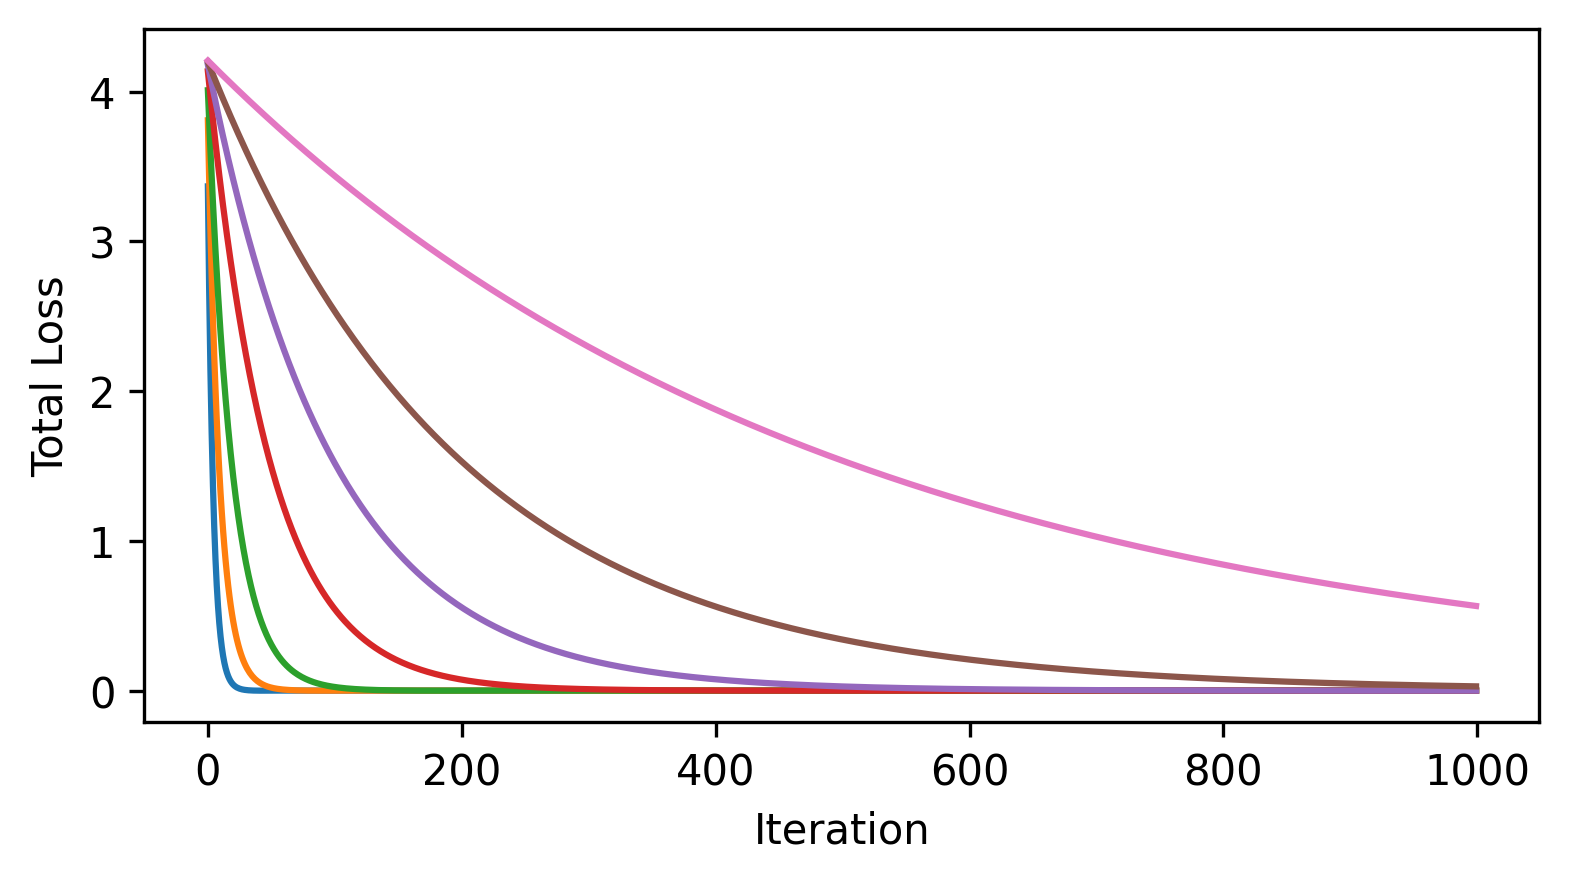

In [153]:
# Gradient descent
iter = 1000
eta = 2e-5

plt.figure(figsize=(6,3), dpi=300)

lr = [2e-4, 1e-4, 5e-5, 2e-5, 1e-5, 5e-6,2e-6]
for eta in lr:
    w_hat = torch.randn(2)*0.01
    Err = []
    for i in range(iter):
        w_hat = w_hat - eta * X.T @(X@w_hat - y)
        err = torch.norm(w_hat- w_real)
        Err.append(err)
        if i % 100 == 0:
            print(f'Iteration: {i}, Error: {err:.4f}')
    Iter = torch.arange(len(Err))
    Err_sample = Err[0:-1:20]
    Iter_sample = Iter[0:-1:20]
    plt.plot(Iter, Err)
    # plt.scatter(Iter_sample, Err_sample, color='r')
plt.xlabel("Iteration")
plt.ylabel("Total Loss")

[tensor(4.1572),
 tensor(3.3898),
 tensor(2.7649),
 tensor(2.2559),
 tensor(1.8412),
 tensor(1.5031),
 tensor(1.2276),
 tensor(1.0028),
 tensor(0.8195),
 tensor(0.6698),
 tensor(0.5477),
 tensor(0.4480),
 tensor(0.3665),
 tensor(0.2999),
 tensor(0.2455),
 tensor(0.2010),
 tensor(0.1646),
 tensor(0.1349),
 tensor(0.1105),
 tensor(0.0905),
 tensor(0.0742),
 tensor(0.0608),
 tensor(0.0498),
 tensor(0.0408),
 tensor(0.0335),
 tensor(0.0274),
 tensor(0.0224),
 tensor(0.0183),
 tensor(0.0150),
 tensor(0.0122),
 tensor(0.0100),
 tensor(0.0081),
 tensor(0.0066),
 tensor(0.0053),
 tensor(0.0043),
 tensor(0.0034),
 tensor(0.0027),
 tensor(0.0022),
 tensor(0.0017),
 tensor(0.0013),
 tensor(0.0010),
 tensor(0.0007),
 tensor(0.0005),
 tensor(0.0003),
 tensor(0.0002),
 tensor(9.2543e-05),
 tensor(0.0001),
 tensor(0.0002),
 tensor(0.0002),
 tensor(0.0003)]